In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Loading the training data
train_df = pd.read_csv('../input/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# get all columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Lets get the description of target
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

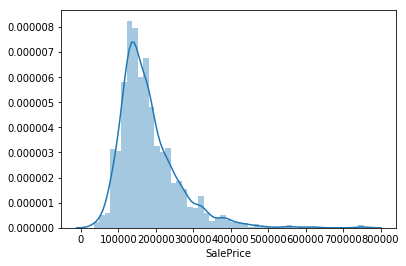

In [6]:
# Histogram
sns.distplot(train_df['SalePrice']);

Sales prices are distributed normally and are positively skewed.

In [7]:
# Skewness and kurtosis
print("Skewness: ", train_df['SalePrice'].skew())
print("Kurtosis: ", train_df['SalePrice'].kurt())

Skewness:  1.88287575977
Kurtosis:  6.53628186006


Our target variable distribution is highly skewed towards right as the value for skewness is more than 1.
Generally, 
If -1/2\<skewness\<1/2, then the data is symmetric, or
If -1\<skewness\<1, then the data is moderately skewed, or
If skewness\<-1 OR skewness\>1, then the data is highly skewed.
Also, the sign (+/-) tells whether the data is positevely or negatively skewed

Also, the data is Leptokurtic as kurtosis >> 0
Generally,
If kurtosis\>0, then the data is Leptokurtic and more peaked compared to normal distribution AND there's less variability, or
If kurtosis\<0, then the data is Platykurtic and less peaked compared to normal distribution AND there's more variability, or
If kurtosis=0, then the data is Mesokurtic and normal.

## Proceeding with the variables
As per some analysis and common sense, the following variables seem to be important in having considerable effect on the dependent variable.  
1. OverallQual - Overall material and finish quality
2. YearBuilt - Original construction date  
3. TotalBsmtSF - Total square feet of basement area  
4. GrLivArea -  Above grade (ground) living area square feet

## Relationship with numeric variables

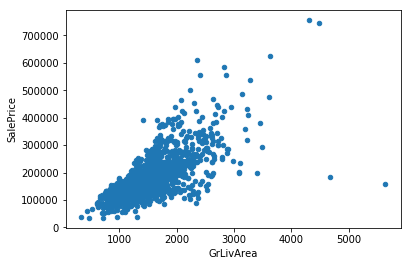

In [8]:
# scatter plot - GrLivArea vs SalePrice
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');
# train_df.plot.scatter(x='GrLivArea', y='SalePrice'); alternate same plot

There seems to be a linear relationship between GrLivArea and SalePrice

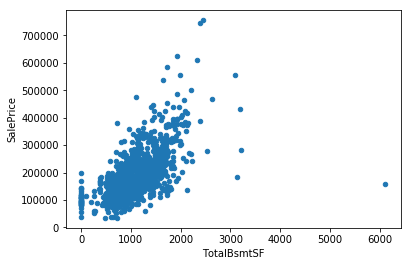

In [9]:
# scatter plot - TotalBsmtSF vs SalePrice
train_df.plot.scatter(x='TotalBsmtSF', y='SalePrice');

Looks like there's a linear relationship.

## Relationship with categorical variables

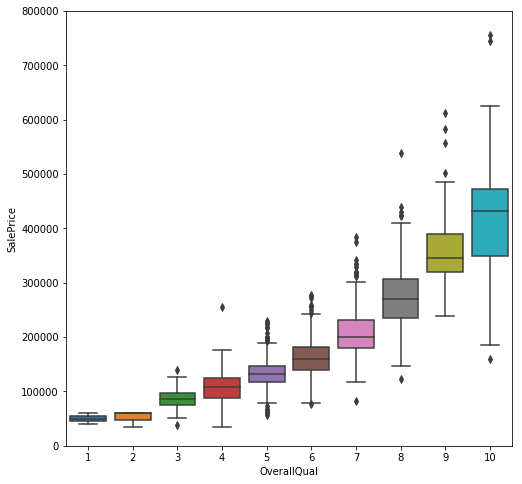

In [10]:
# Boxplot OverallQual vs SalePrice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize= (8, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

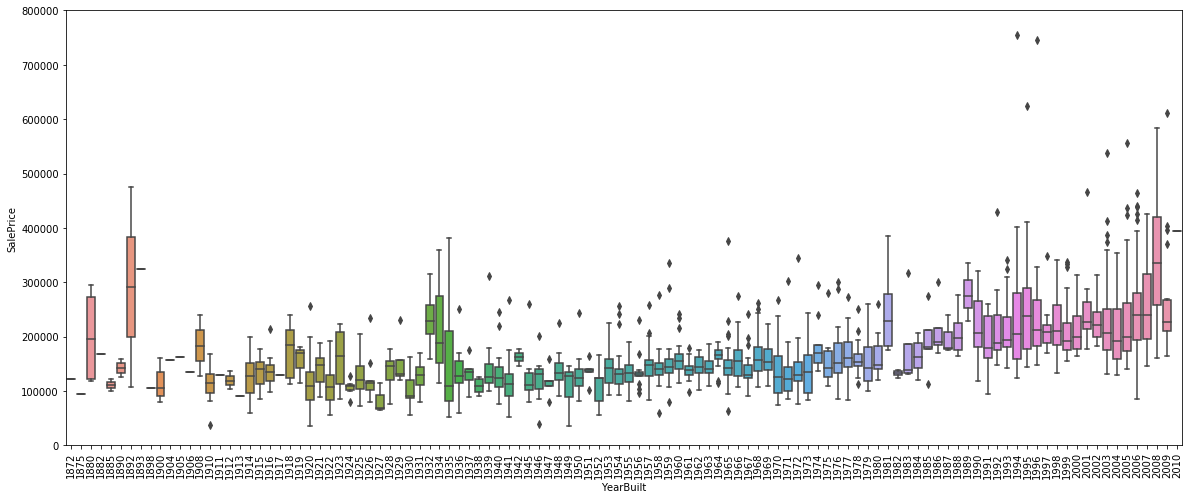

In [11]:
# YearBuilt vs SalePrice
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We could've thought the same that prices for new houses would be more than that for the old ones.

## Summary
1. Both 'GrLivArea' and 'TotalBsmtSF' seem to have a positive linear relationship with the dependent variable - 'SalePrice'. 'TotalBsmtSF', in particular, seems to have high slope.  
2. Both 'OverallQual' and 'YearBuilt' seem to have relationship with 'SalePrice'. The relationship seems to be stronger in case of 'OverallQual' as, when it increases, the 'SalePrice' also increase.  
  


### Correlation Matrix (hearmap style)

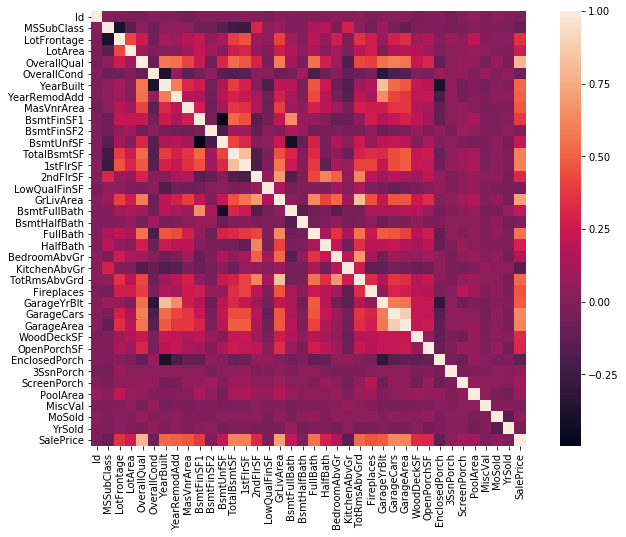

In [12]:
# Correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, square=True);

That's a great way to visualize how strong variable pairs have correlations.  
'TotalBsmtSF' and '1stFlrSF' seem to be highly correlated. Likewise, we can see that there are other pairs also that seem to have more correlation as compared to others. Srong ccorrelations can indicate multicollinearity. It's one place where we should not go. This is mainly because using any one will get our job done. We need not use the other as it is "redundant" in explaining the dependent variable (as explained by the correlation matrix). We should keep this thing in mind.  
Also, as thought initially, the variables  'GrLivArea', 'TotalBsmtSF', and 'OverallQual' seem to have a nice correlation with 'SalePrice'. However, there are other variables too, that seem to have good amount of correlation with 'SalePrice'.

### 'SalePrice' correlation matrix (zoomed heatmap style)

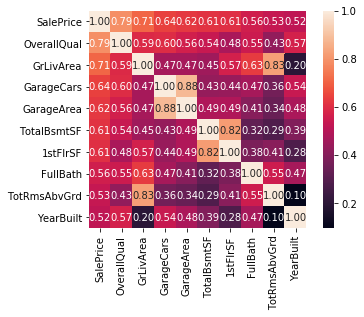

In [13]:
# SalePrice correlation Matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cm = np.corrcoef(train_df[cols])
cm = np.corrcoef(train_df[cols].values, rowvar=False)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
           annot_kws={'size':10}, yticklabels=cols.values, 
            xticklabels=cols.values)
plt.show();

1. SalePrice seem to be highly related with OverallQual and GrLivArea and moderately related with GarageCars, GarageArea, TotalBsmtSF and 1stFlrSF.  
2. GarageCars and GarageArea are highly related to each other. Its hard to distinguish them. So, we'll keep only one(which has better correlation with SaleProce) and get rid of the other. Let's keep GarageCars.  
3. Same is the case with TotalBsmtSF and 1stFlrSF. Let's keep TotalBsmtSF.  
4. Again, TotRmsAbvGrd and GrLivArea exhibit high correlation. Let's keep GrLivArea, as it has more correlation with SalePrice

## Lets see some scatter plots of these variables each with the 'SalePrice'

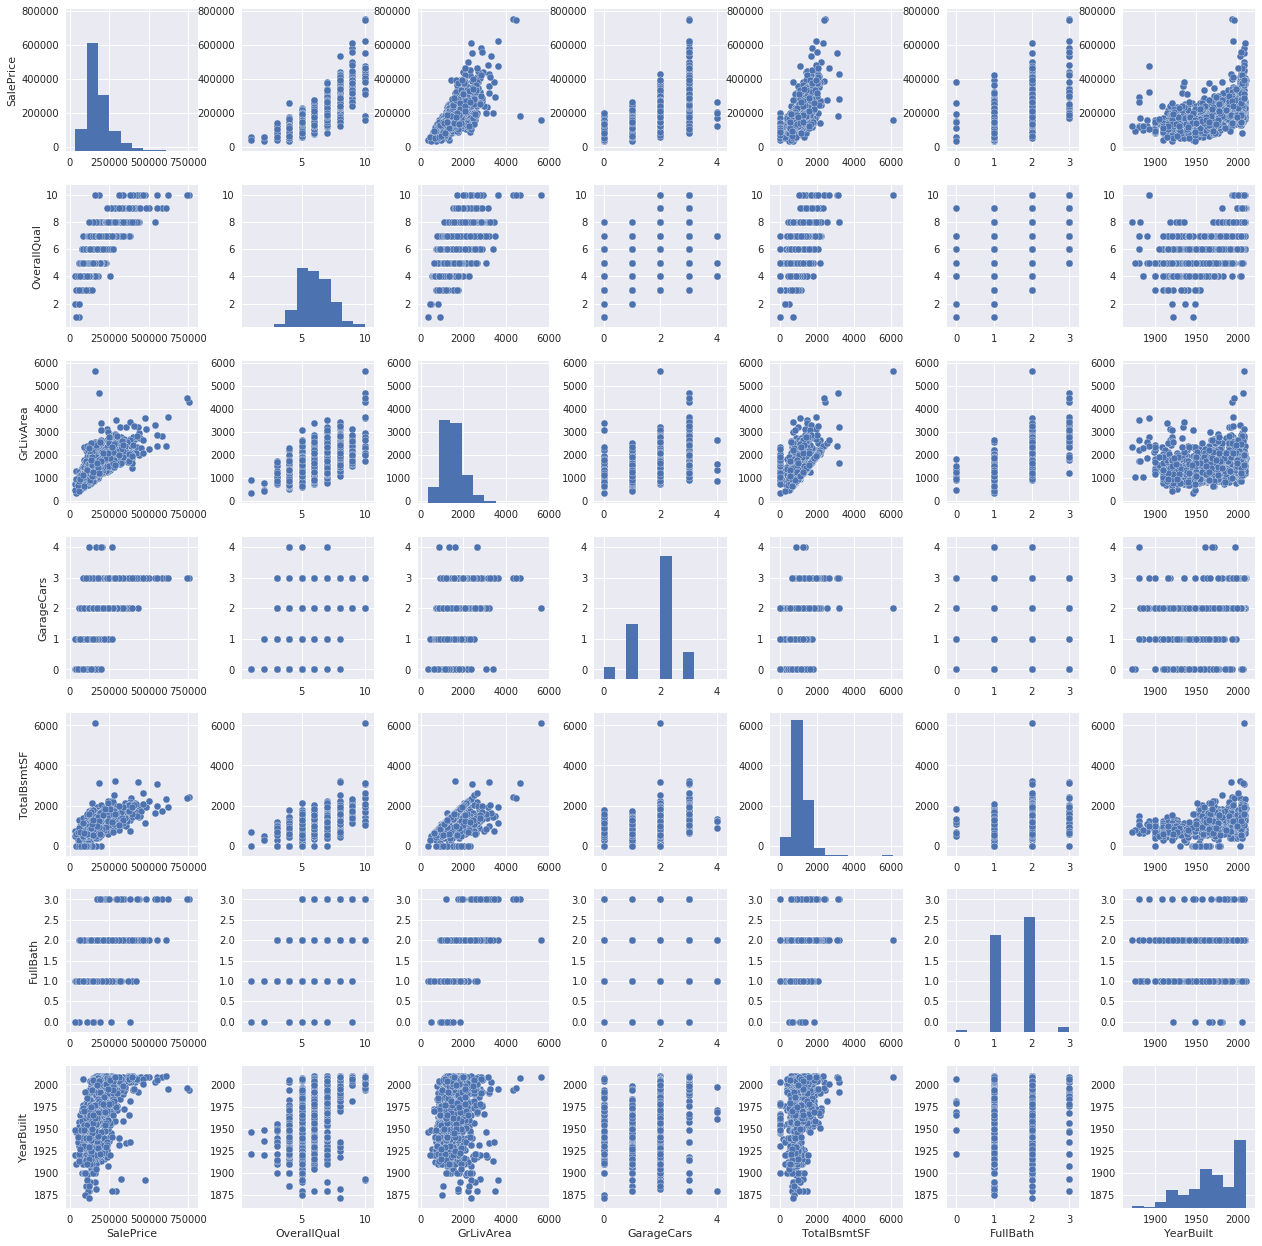

In [14]:
# sns.set()
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size=2.5)
plt.show();

This is one really helpful plot that gives us idea about too many variables at a single glance. There seems to be good correlation between YearBuilt and SalePrice, TotalBsmntArea and GrLivArea.

# Missing Data
There are two main things to find out when dealing with missing data:  
1. How prevalent or abundant in missing data.  
2. Is there any missing data process in action, meaning whether there's any pattern in missing data.  

Study based on these points is important as it'll help us decide what to do while dealing with missing data. Ultmately, we'll be applying some remedy to deal with the missing data, but we need to make sure that whatever remedy we apply, it will not affect the nature of the data, or it will not introduce any bias in the data. Basically, what we want is that the remedy applied should result in minimim possible alteration in what the data offers for interpretation.

The best thing that could ever happen while studying missing data is that we identify the missing data process. If this is the case, then we can more accurately impute missing data values. If that's not the case, then we'll lose a lot of data if we decide to wipe out the records or attributes having missing data, as partial data is as good as no data for analysis. According to Hair et al., chapter 2 regarding missing data analysis, removal of all the samples or attributes from a data set conatining 5 percent randomly missing data among 5 attrubutes might result in 40 percent reduced sample size as on average almost 60 perccent of the data will have at least one missing value.  

Also, from a substantive standpoint, any analysis on data having non-random missing values is biased. For example, we'll highly suspect of the results of our analysis on a data set in which data is missing for people having very high income.  

Thus, the bottom line is that we should give special attention to missing data as proper treatment will ensure that the results we get after analysis are not that biased.

In [15]:
# Missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/len(train_df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5 problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [16]:
train_df = train_df.drop(missing_data[missing_data['Total']>1].index, 1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df.isnull().sum().max()

0

# Outliers

## Univariate Analysis

In [17]:
# Standardizing Data
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


Bivariate Anlaysis

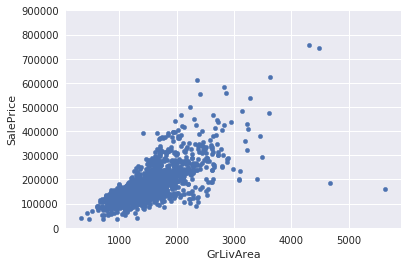

In [18]:
var = 'GrLivArea'
data = pd.concat([train_df[var], train_df['SalePrice']], 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,900000));

In this scatter plot, there are 2 values with bigger GrLivArea but there SalePrices are too low. This shouldn't be the case generally. These 2 cases don't follow the trend in the plot also. These are outiers. We'll delete these observations.  

Also, there are 2 dots at the top of the plot. These 2 also seem to be a bit disconneced with the rest of the graph. However, we mght wanna refraing ourselves from calling these dots as outliers as they seem to follow the trend in the plot.

In [19]:
train_df.sort_values(by='GrLivArea', ascending=False)['GrLivArea'][:2]
train_df = train_df.drop(train_df[train_df['GrLivArea']==5642].index)
train_df = train_df.drop(train_df[train_df['GrLivArea']==5676].index)
# train_df[train_df['Id']==1299]

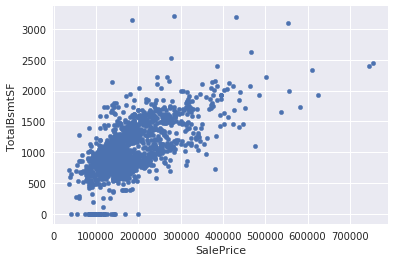

In [20]:
# Bivariate Analysis SalePrice and TotalBsmtSf
var = 'TotalBsmtSF'
data = pd.concat([train_df[var], train_df['SalePrice']], axis=1)
data.plot.scatter(x='SalePrice', y=var);

I guess we should not eliminate cases here as almost all the observations tend to follow the trend in the plot. We might wanna retain all that we have now for these variables.

According to Hair et al. (2013), four assumptions should be tested:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Checking Normality

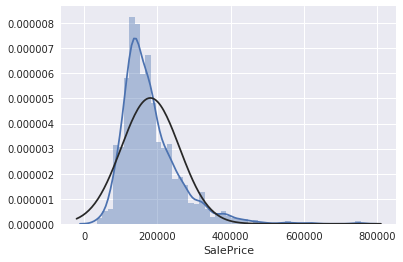

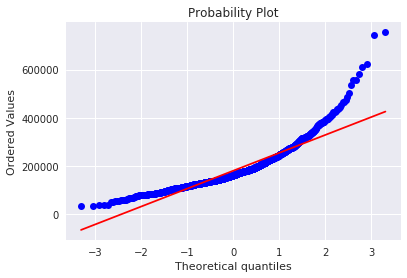

In [27]:
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)


As we can see, the SalePrice is not distributed normally. It is peaked and positively skewed. However, a simple transformation could solve the problem. In case of positive skewness, log transformations usually work well.

In [28]:
# Applying log transformations
train_df['SalePrice'] = np.log(train_df['SalePrice'])

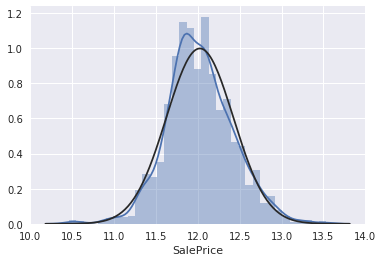

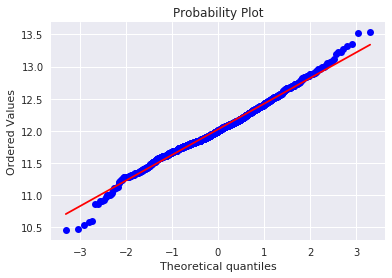

In [31]:
# New histogram and probability plot
sns.distplot(train_df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

So now, our SalePrice is normal.  

### Next, let's check GrLivArea

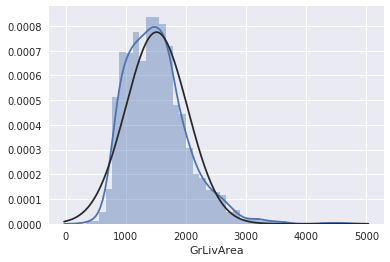

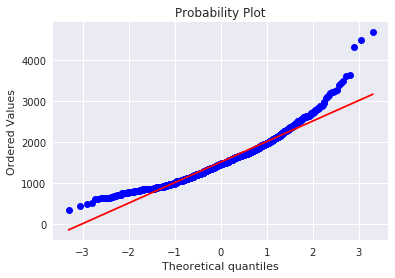

In [33]:
# Histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

Skewness again, let's go for log transformation as we've done just now.

In [34]:
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

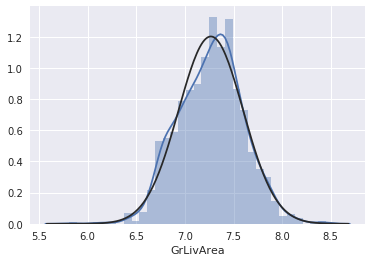

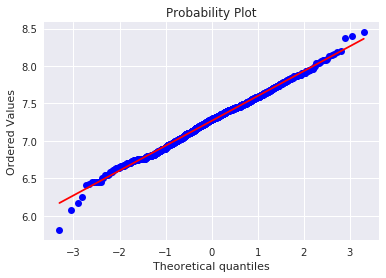

In [35]:
# New plot
sns.distplot(train_df['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

Done. Let's check the next variable TotalBsmtSF

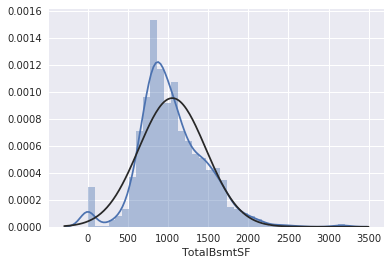

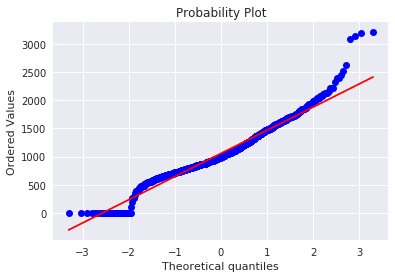

In [37]:
sns.distplot(train_df['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [38]:
# Creating a new column
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0
train_df.loc[train_df['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [41]:
# Transform Data
train_df.loc[train_df['HasBsmt']==1, 'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

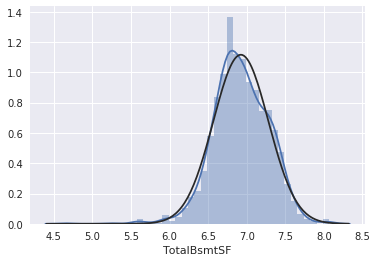

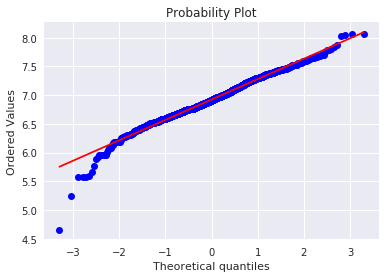

In [43]:
# histogram and normal plot
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Testing Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

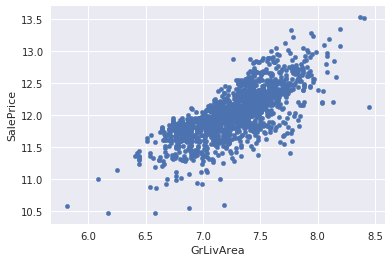

In [46]:
# Scatter plot of SalePrice and GrLivArea
train_df.plot.scatter('GrLivArea', 'SalePrice')
plt.show()

Older versions of this scatter plot (previous to log transformations), had a conic shape. As we can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

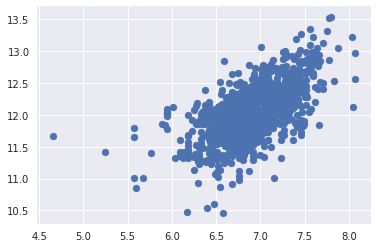

In [49]:
plt.scatter(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], train_df[train_df['TotalBsmtSF']>0]['SalePrice']);

We can say that SalePrice exhibits equal levels of variance across the range of TotalBsmtSF.

1. Last thing, lets convert categorical variables into dummy variables.

In [51]:
train_df = pd.get_dummies(train_df)

# Conclusion
Throughout this kernel we put in practice many of the strategies proposed by Hair et al. (2013). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables.
